# <div style="text-align: center;">  Підготовка та аналіз даних  </div> #

# <div style="text-align: center;"> _Лабораторна робота №6_ </div> #


## <div style="text-align: right;"> _ФБ-24 Бадрак Іван_ </div> ##


#### <u>**Проста лінійна регресія**</u> - це метод аналізу взаємозв'язку між двома змінними, де одна змінна (незалежна) використовується для передбачення значень іншої (залежної) змінної, припускаючи лінійний зв'язок між ними. ####
#### 1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів. ####

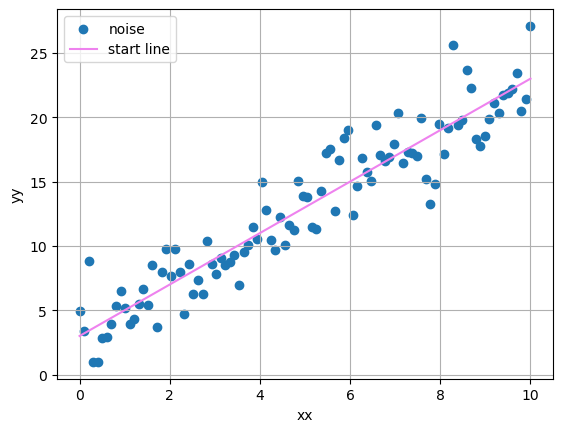

In [131]:
import numpy as np
import matplotlib.pyplot as plt

#наперед задана пряма yy = kk + bb
kk = 2
bb = 3

#генерація значення xx
xx = np.linspace(0, 10, 100)

#прямя yy зі згенерованим шумом
noise = np.random.normal(0, 2, 100)
yy = kk * xx + bb + noise

#візуалізація даних
plt.scatter(xx, yy, label='noise')
plt.plot(xx, kk * xx + bb, color='violet', label='start line')
plt.xlabel('xx')
plt.ylabel('yy')
plt.grid()
plt.legend()
plt.show()


#### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок.
$$
kk.opti = \frac {n∑(xy)−∑x∑y}{n∑(x^2)-(∑x)^2}
$$
$$
bb.opti = \frac {∑y - kk.opti * ∑x} {n}
$$
​


In [132]:
#метод найменших квадратів
def least_squares(xx, yy):
    n = len(xx)

    kk_opti = (n * (xx*yy).sum() - xx.sum() * yy.sum()) / (n * (xx*xx).sum() - xx.sum() ** 2)
    bb_opti = (yy.sum() - kk_opti * xx.sum()) / n

    return kk_opti, bb_opti

kk_opti, bb_opti = least_squares(xx, yy)

print (kk_opti, bb_opti)

def error_value(kk, bb, kk_test, bb_test):
    kk_error = (abs(kk - kk_test)/kk) * 100
    bb_error = (abs(bb - bb_test)/bb) * 100
    print(f"Величина абсолютної похибки для коефіцієнту kk: {np.abs(kk-kk_test)}\nВеличина абсолютної похибки для коефіцієнту bb: {np.abs(bb-bb_test)}\nВеличина відносної помилки для коефіцієнту kk: {kk_error} %\nВеличина відносної помилки для коефіцієнту bb: {bb_error} %")

error_value(kk, bb, kk_opti, bb_opti)

1.9840597763735812 3.083684799772874
Величина абсолютної похибки для коефіцієнту kk: 0.01594022362641878
Величина абсолютної похибки для коефіцієнту bb: 0.08368479977287402
Величина відносної помилки для коефіцієнту kk: 0.7970111813209391 %
Величина відносної помилки для коефіцієнту bb: 2.789493325762467 %


#### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1)

In [133]:
#оцінка за допомогою np.polyfit
kk_opti_poly, bb_opti_poly = np.polyfit(xx, yy, 1)
print (kk_opti_poly, bb_opti_poly)
error_value(kk, bb, kk_opti_poly, bb_opti_poly)

1.98405977637358 3.083684799772881
Величина абсолютної похибки для коефіцієнту kk: 0.01594022362641989
Величина абсолютної похибки для коефіцієнту bb: 0.08368479977288112
Величина відносної помилки для коефіцієнту kk: 0.7970111813209946 %
Величина відносної помилки для коефіцієнту bb: 2.789493325762704 %


#### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

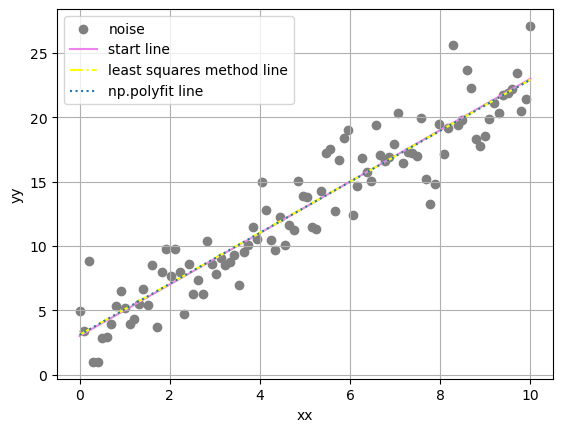

In [134]:
#оцінки лінії регресії на графіку разом з наперед заданою прямою
plt.scatter(xx, yy, label='noise', color='gray')
plt.plot(xx, kk * xx + bb, label='start line', color='violet')
plt.plot(xx, kk_opti * xx + bb_opti, label='least squares method line', linestyle='dashdot', color='yellow')
plt.plot(xx, kk_opti_poly * xx + bb_opti_poly, label='np.polyfit line', linestyle='dotted')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid()
plt.show()

#### 5. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок.
#### <b><u>Метод градієнтного спуску</u></b>(найшвидшого спуску) – ітеративний метод оптимізації (мінімізації) деякої функції (ми мінімізуємо функцію найменших квадратів). Для знаходження локального мінімуму функції здійснюються кроки, пропорційні протилежному значенню градієнта в поточній точці (початкова точка обирається навмання). Величина кроку (learning rate) – відстань, на яку змінюються параметри кожної ітерації. Деякі формули, що будуть використані в реалізованій функції:

$$
\frac{∂L}{∂β_0} = -2\frac{1}{n}∑(y_i - y.grad)
$$
$$
\frac{∂L}{∂β_1} = -2\frac{1}{n}∑x_i(y_i - y.grad)
$$
$$
β_0^I = β_0^i - learning.rate * \frac{∂L}{∂β_0}, I = (i+1)
$$
$$
β_1^I = β_1^i - learning.rate * \frac{∂L}{∂β_1}, I = (i+1)
$$

In [135]:
#функція, що реалізує метод градієнтного спуску
def grad_descent(xx, yy, learning_rate, n_iter):
    #ініціалізація початкових значень
    n = len(xx)
    kk_opti = 0
    bb_opti = 0

    for i in range(n_iter):
        #поточні прогнози
        yy_grad = kk_opti * xx + bb_opti
        #обчисленя часткових похідних
        kk_grad = (-2 / n) * ((xx * (yy - yy_grad)).sum())
        bb_grad = (-2 / n) * ((yy - yy_grad).sum())
        #оновлення параметрів
        kk_opti -= learning_rate * kk_grad
        bb_opti -= learning_rate * bb_grad

    return kk_opti, bb_opti

learning_rate = 0.01
n_iter = 1000

kk_grad, bb_grad = grad_descent(xx, yy, learning_rate, n_iter)
print (kk_grad, bb_grad)

error_value(kk, bb, kk_grad, bb_grad)

1.986885350577388 3.0648927622221698
Величина абсолютної похибки для коефіцієнту kk: 0.01311464942261198
Величина абсолютної похибки для коефіцієнту bb: 0.06489276222216978
Величина відносної помилки для коефіцієнту kk: 0.655732471130599 %
Величина відносної помилки для коефіцієнту bb: 2.163092074072326 %


#### 6. Додайте отриману лінію регресії на загальний графік

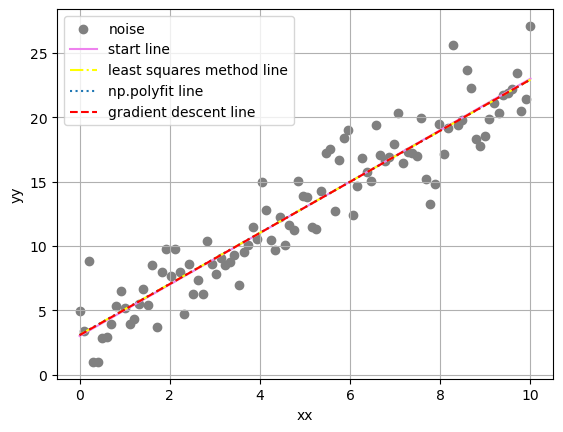

In [136]:
plt.scatter(xx, yy, label='noise', color='gray')
plt.plot(xx, kk * xx + bb, label='start line', color='violet')
plt.plot(xx, kk_opti * xx + bb_opti, label='least squares method line', linestyle='dashdot', color='yellow')
plt.plot(xx, kk_opti_poly * xx + bb_opti_poly, label='np.polyfit line', linestyle='dotted')
plt.plot(xx, kk_grad * xx + bb_grad, label='gradient descent line', linestyle='dashed', color='red')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid()
plt.show()

#### 6. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

Остання похибка: 4.249454007897145
Кількість ітерацій: 758


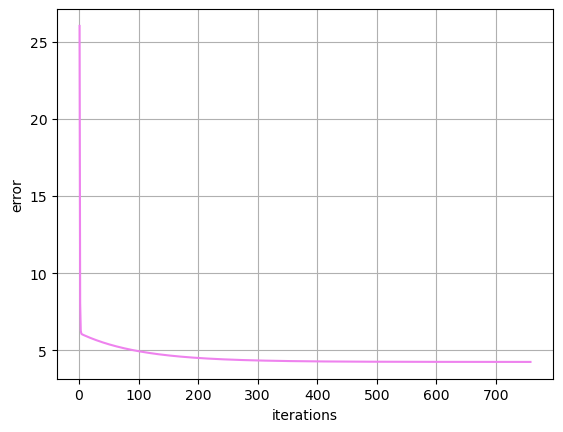

In [139]:
#середньоквадратична помилка
def grad_loss(xx, yy, kk, bb):
    yy_grad = kk * xx + bb
    return np.mean((yy_grad - yy) ** 2)

#похибка від кількості ітерацій
errors = []
prev_error = 0
iter = []
for i in range(1, n_iter + 1):
    kk_grad, bb_grad = grad_descent(xx, yy, learning_rate, i)
    error = grad_loss(xx, yy, kk_grad, bb_grad)
    errors.append(error)
    iter.append(i)

    if np.abs(error - prev_error) < 1e-5:
        break

    prev_error = error

print(f"Остання похибка: {errors[-1]}")
print(f"Кількість ітерацій: {i}")

#графік залежності похибки від кількості ітерацій
plt.plot(iter, errors, color='violet')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid()
plt.show()